In [10]:
# install kneed using command
# pip install kneed

from kneed import KneeLocator
import numpy as np
from matplotlib import pyplot as plt

Paste CIFAR and MNIST precisions results from corresponding scripts

In [4]:


precision_cifar10 = [0.08984375,
                     0.20703125,
                     0.302734375,
                     0.400390625,
                     0.478515625,
                     0.541015625,
                     0.615234375,
                     0.65234375,
                     0.71484375,
                     0.759765625,
                     0.78125,
                     0.80859375,
                     0.83984375,
                     0.841796875,
                     0.8671875,
                     0.884765625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.8984375,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625,
                     0.900390625]


precision_mnist = [0.501953125,
                   0.591796875,
                   0.662109375,
                   0.73046875,
                   0.78125,
                   0.8046875,
                   0.826171875,
                   0.8203125,
                   0.818359375,
                   0.814453125,
                   0.80078125,
                   0.79296875,
                   0.79296875,
                   0.783203125,
                   0.783203125,
                   0.78515625,
                   0.78125,
                   0.78515625,
                   0.783203125,
                   0.783203125,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625,
                   0.78515625]


min_cost_mnist = [7.251980677629612,
                  6.967559738760735,
                  6.7679544846552435,
                  6.607327767550981,
                  6.489189523423514,
                  6.403784329450507,
                  6.3287009520501245,
                  6.279683779163465,
                  6.240085880761756,
                  6.206507344811193,
                  6.178300643444123,
                  6.160927248129265,
                  6.145135876603492,
                  6.1355004485668525,
                  6.129153093716129,
                  6.124869322304439,
                  6.120970878561359,
                  6.118444586021998,
                  6.11634471826801,
                  6.114855688486108,
                  6.114115222901423,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015,
                  6.1138524098812015]


min_cost_cifar10 = [28.423597968260502,
                    26.715358244431815,
                    25.363647786698245,
                    24.09432764768814,
                    22.906335045005125,
                    21.814592222899147,
                    20.71774483080501,
                    19.623781518179943,
                    18.55087943661091,
                    17.552101495536988,
                    16.527580102513618,
                    15.563242659408546,
                    14.585505263774948,
                    13.581550010807652,
                    12.726243135400834,
                    11.844717414295944,
                    11.102467003553633,
                    10.608715556371564,
                    10.27793988504569,
                    10.034044083663069,
                    9.888448244713864,
                    9.785095983449978,
                    9.697685334476658,
                    9.657520308680926,
                    9.623443213137115,
                    9.586423536948551,
                    9.5576230391939,
                    9.533453345442416,
                    9.515089125469672,
                    9.501672682941495,
                    9.496304189861467,
                    9.496073997231282]



cs_mnist = np.logspace(0, np.log10(32), 32)
c_star_mnist = 10

cs_cifar10 = np.logspace(0,np.log10(60),32)
c_star_cifar10 = 49.0


In [5]:
def knee_c(c_list, costs):
    x = 1/c_list
    y = costs/c_list

    fig, axs = plt.subplots(1,2,figsize = (9,3))
    axs[0].semilogy(x, y, 'o')
    axs[0].set_title('1/c versus cost/c')

    y_1st = np.diff(y, n=1)
    step_scale = 10
    new_x = np.arange(x[0], x[-1], 0.01/step_scale)
    y_1st_interp = np.interp(new_x.ravel(), x[:-1].ravel(), y_1st.ravel())
    axs[1].plot(new_x, y_1st_interp, 'o')
    axs[1].set_title('1st derivative interpolated')
    knee_1_c = KneeLocator(new_x, y_1st_interp, 1, curve="convex", direction="increasing", online=True).knee
    
    return 1/knee_1_c


In [6]:
from scipy.interpolate import CubicSpline

def peak_c(c_list, costs):
    x = 1/c_list
    y = costs/c_list

    fig, axs = plt.subplots(1,3, figsize = (9,3) )
    axs[0].semilogy(x,y,'o')
    axs[0].set_title('1/c versus cost/c')

    y_1st = np.diff(y, n=1)
    step_scale = 10
    new_x = np.arange(x[0],x[-1],0.01/step_scale)
    y_1st_interp = np.interp(new_x.ravel(), x[:-1].ravel(), y_1st.ravel())
    axs[1].plot(new_x,y_1st_interp,'o')
    axs[1].set_title('1st derivative interpolated')
    
#    ratio = y_1st_interp[1:]/y_1st_interp[:-1] # from text
    ratio = (y_1st_interp[step_scale:]-y_1st_interp[:-step_scale])/y_1st_interp[:-step_scale] # from picture Figure 3

    ratio /= np.max(ratio)
    axs[2].plot(new_x[step_scale:],ratio,'o')
    axs[2].set_title('ratio')


    newest_x = new_x[step_scale:]

#    peaks = find_peaks(ratio,prominence=0.1)
#    print(peaks)
#    peak_1_c = np.min(newest_x[peaks[0]])
#    peak_1_c = np.min(newest_x[ratio>0.1])
    peak_1_c = newest_x[np.argmax(ratio)]
    c_peak = 1/peak_1_c
    return c_peak

MNIST

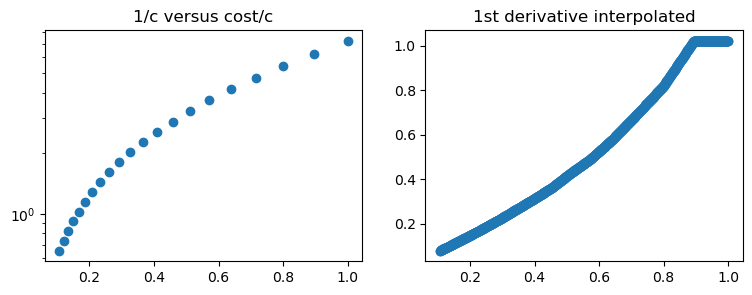

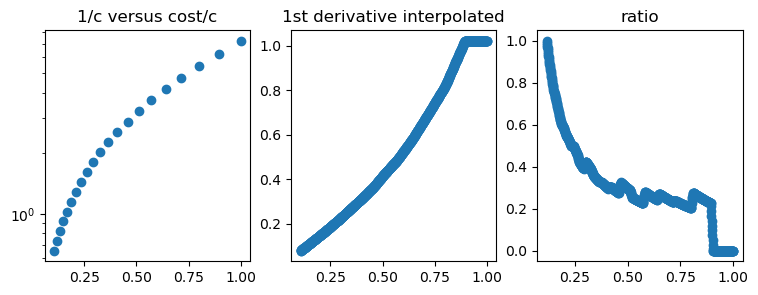

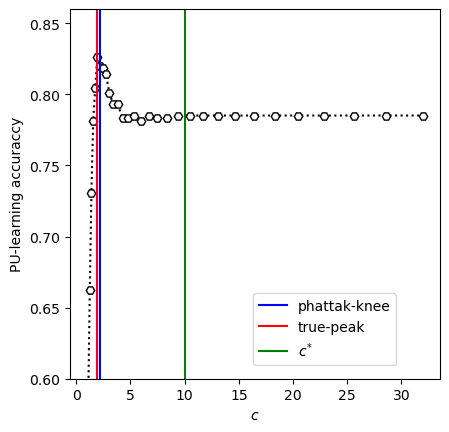

In [7]:
c_list_tt = np.flip(cs_mnist[cs_mnist <= c_star_mnist])
costs_tt = np.flip(np.array(min_cost_mnist)[cs_mnist <= c_star_mnist])

aa = knee_c(c_list_tt, costs_tt)
aa1 = peak_c(c_list_tt, costs_tt)
fig, ax = plt.subplots(1,1)
ax.plot(cs_mnist, np.array(precision_mnist), "H:k", markerfacecolor="w")
# plt.axvline(x=cs_mnist[np.argwhere(cs_mnist >= aa1)[0].item()], color="b", label="phatak-peak")
# ax.axvline(x=aa1, color="b", label="phatak-peak")
ax.axvline(x=aa, color="b", label="phattak-knee")
ax.axvline(x=cs_mnist[np.argmax(precision_mnist)], color="r", label="true-peak")
ax.axvline(x=c_star_mnist, color="g", label="$c^{*}$")
ax.set_ylim([0.6, 0.86])
ax.set_xlabel("$c$")
ax.set_ylabel("PU-learning accuraccy")
ax.set_box_aspect(1)
ax.legend(ncol=1, bbox_to_anchor=(0.9,0.25))
fig.savefig('MNIST-SS_Knee.png', bbox_inches='tight', dpi=500, format='png')
fig.savefig('MNIST-SS_Knee.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig.savefig('MNIST-SS_Knee.svg', bbox_inches='tight', dpi=500, format='svg')


CIFAR10

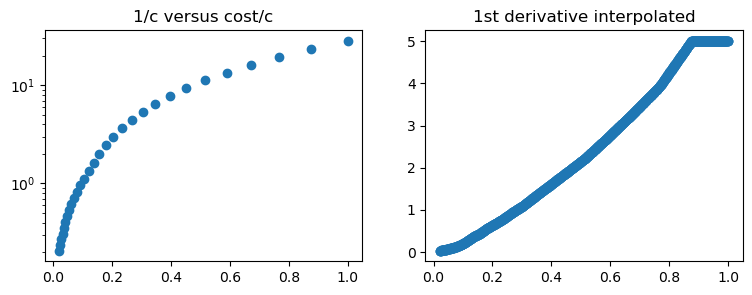

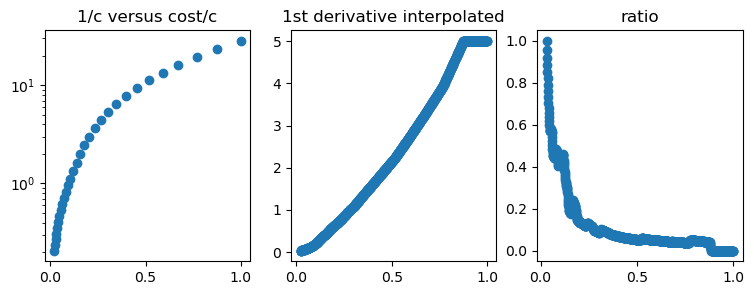

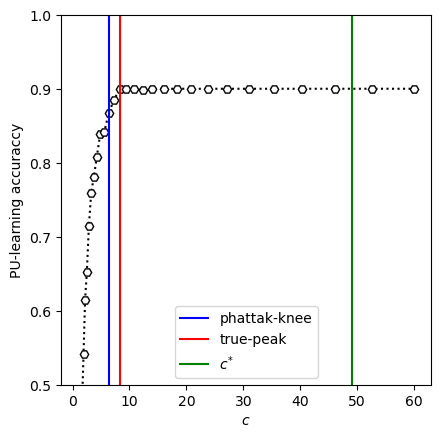

In [8]:
c_list_tt = np.flip(cs_cifar10[cs_cifar10 <= c_star_cifar10])
costs_tt = np.flip(np.array(min_cost_cifar10)[cs_cifar10 <= c_star_cifar10])
aa = knee_c(c_list_tt, costs_tt)
aa1 = peak_c(c_list_tt, costs_tt)


fig, ax = plt.subplots(1, 1)
ax.plot(cs_cifar10, np.array(precision_cifar10), "H:k", markerfacecolor="w")
# plt.axvline(x=cs_mnist[np.argwhere(cs_mnist >= aa1)[0].item()], color="b", label="phatak-peak")
# plt.axvline(x=aa1, color="b", label="phatak-peak")
ax.axvline(x=aa, color="b", label="phattak-knee")
ax.axvline(x=cs_cifar10[np.argmax(precision_cifar10)], color="r", label="true-peak")
ax.axvline(x=c_star_cifar10, color="g", label="$c^{*}$")
ax.set_ylim([0.5, 1])
ax.set_xlabel("$c$")
ax.set_ylabel("PU-learning accuraccy")
ax.legend(ncol=1, bbox_to_anchor=(0.9, 0.25))
ax.set_box_aspect(1)
plt.legend()
fig.savefig('CIFAR10-SS_Knee.png', bbox_inches='tight', dpi=500, format='png')
fig.savefig('CIFAR10-SS_Knee.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig.savefig('CIFAR10-SS_Knee.svg', bbox_inches='tight', dpi=500, format='svg')